In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# QUICK INSIGHTS OF DATA

In [2]:
df = pd.read_excel('air_flight_train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
[df[col].unique() for col in df.columns]

[array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
        'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
        'Vistara Premium economy', 'Jet Airways Business',
        'Multiple carriers Premium economy', 'Trujet'], dtype=object),
 array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
        '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
        '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
        '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
        '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
        '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
        '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
        '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
        '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
        '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object),
 array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mum

In [7]:
df.shape

(10683, 11)

In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
a=[col for col in df.columns if df[col].dtypes == 'object']

In [10]:
df[a].describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
{col:'{} %'.format((df[col].isnull().sum())*100/df.shape[0]) for col in df.columns}

{'Airline': '0.0 %',
 'Date_of_Journey': '0.0 %',
 'Source': '0.0 %',
 'Destination': '0.0 %',
 'Route': '0.009360666479453337 %',
 'Dep_Time': '0.0 %',
 'Arrival_Time': '0.0 %',
 'Duration': '0.0 %',
 'Total_Stops': '0.009360666479453337 %',
 'Additional_Info': '0.0 %',
 'Price': '0.0 %'}

In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [16]:
{col:'{} %'.format((df[col].isnull().sum())*100/df.shape[0]) for col in df.columns}

{'Airline': '0.0 %',
 'Date_of_Journey': '0.0 %',
 'Source': '0.0 %',
 'Destination': '0.0 %',
 'Route': '0.0 %',
 'Dep_Time': '0.0 %',
 'Arrival_Time': '0.0 %',
 'Duration': '0.0 %',
 'Total_Stops': '0.0 %',
 'Additional_Info': '0.0 %',
 'Price': '0.0 %'}

# EDA

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
df["journey_day"] = pd.to_datetime(df["Date_of_Journey"]).dt.day
df["journey_month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month
df.drop(["Date_of_Journey"],axis = 1,inplace = True)

df["dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"],axis = 1,inplace = True)

df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"],axis = 1,inplace = True)

for i in range(len(df["Duration"])):
    if (len(df["Duration"].iloc[i].split())!=2) and (len(df["Duration"].iloc[i])<=3):
        if df["Duration"].iloc[i][-1] == 'h':
                df["Duration"].iloc[i] = df["Duration"].iloc[i]+" "+"0m"
        else:
                df["Duration"].iloc[i] = "0h"+" "+df["Duration"].iloc[i]
                
                
a = df["Duration"].apply(lambda x:x.split())
hour = []
for i in range(len(a)):
    hour.append(int(a.iloc[i][0][:-1]))
    
df["Duration_in_hour"] = hour

minute = []
for i in range(len(a)):
    minute.append(int(a.iloc[i][1][:-1]))
    
df["Duration_in_minute"] = minute
df.drop(["Duration"],axis = 1, inplace = True)

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first = True)

Source = df[["Source"]]
Source = pd.get_dummies(Source,drop_first = True)

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first = True)

df.drop(["Route","Additional_Info"],axis = 1, inplace = True)

df.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4},inplace = True)
data_train = pd.concat([df,Airline,Source,Destination],axis = 1)
data_train.drop(["Airline", "Source","Destination"],axis = 1,inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_in_hour,Duration_in_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [20]:
data_train.shape

(10682, 30)

In [21]:
df = pd.read_excel('air_flight_test.xlsx')

In [22]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [23]:
df["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [24]:
df["journey_day"] = pd.to_datetime(df["Date_of_Journey"]).dt.day
df["journey_month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month
df.drop(["Date_of_Journey"],axis = 1,inplace = True)

df["dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"],axis = 1,inplace = True)

df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"],axis = 1,inplace = True)

for i in range(len(df["Duration"])):
    if (len(df["Duration"].iloc[i].split())!=2) and (len(df["Duration"].iloc[i])<=3):
        if df["Duration"].iloc[i][-1] == 'h':
                df["Duration"].iloc[i] = df["Duration"].iloc[i]+" "+"0m"
        else:
                df["Duration"].iloc[i] = "0h"+" "+df["Duration"].iloc[i]
                
                
a = df["Duration"].apply(lambda x:x.split())
hour = []
for i in range(len(a)):
    hour.append(int(a.iloc[i][0][:-1]))
    
df["Duration_in_hour"] = hour

minute = []
for i in range(len(a)):
    minute.append(int(a.iloc[i][1][:-1]))
    
df["Duration_in_minute"] = minute
df.drop(["Duration"],axis = 1, inplace = True)

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first = True)

Source = df[["Source"]]
Source = pd.get_dummies(Source,drop_first = True)

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first = True)

df.drop(["Route","Additional_Info"],axis = 1, inplace = True)

df.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4},inplace = True)
data_test = pd.concat([df,Airline,Source,Destination],axis = 1)
data_test.drop(["Airline", "Source","Destination"],axis = 1,inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
data_test.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_minute,Arrival_hour,Arrival_minute,Duration_in_hour,Duration_in_minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
data_test.shape

(2671, 28)

In [27]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_in_hour',
       'Duration_in_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [28]:
data_test.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'dep_hour', 'dep_minute',
       'Arrival_hour', 'Arrival_minute', 'Duration_in_hour',
       'Duration_in_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [29]:
X = data_train.drop('Price',axis = 1)
y = data_train["Price"]

In [30]:
import seaborn as sns

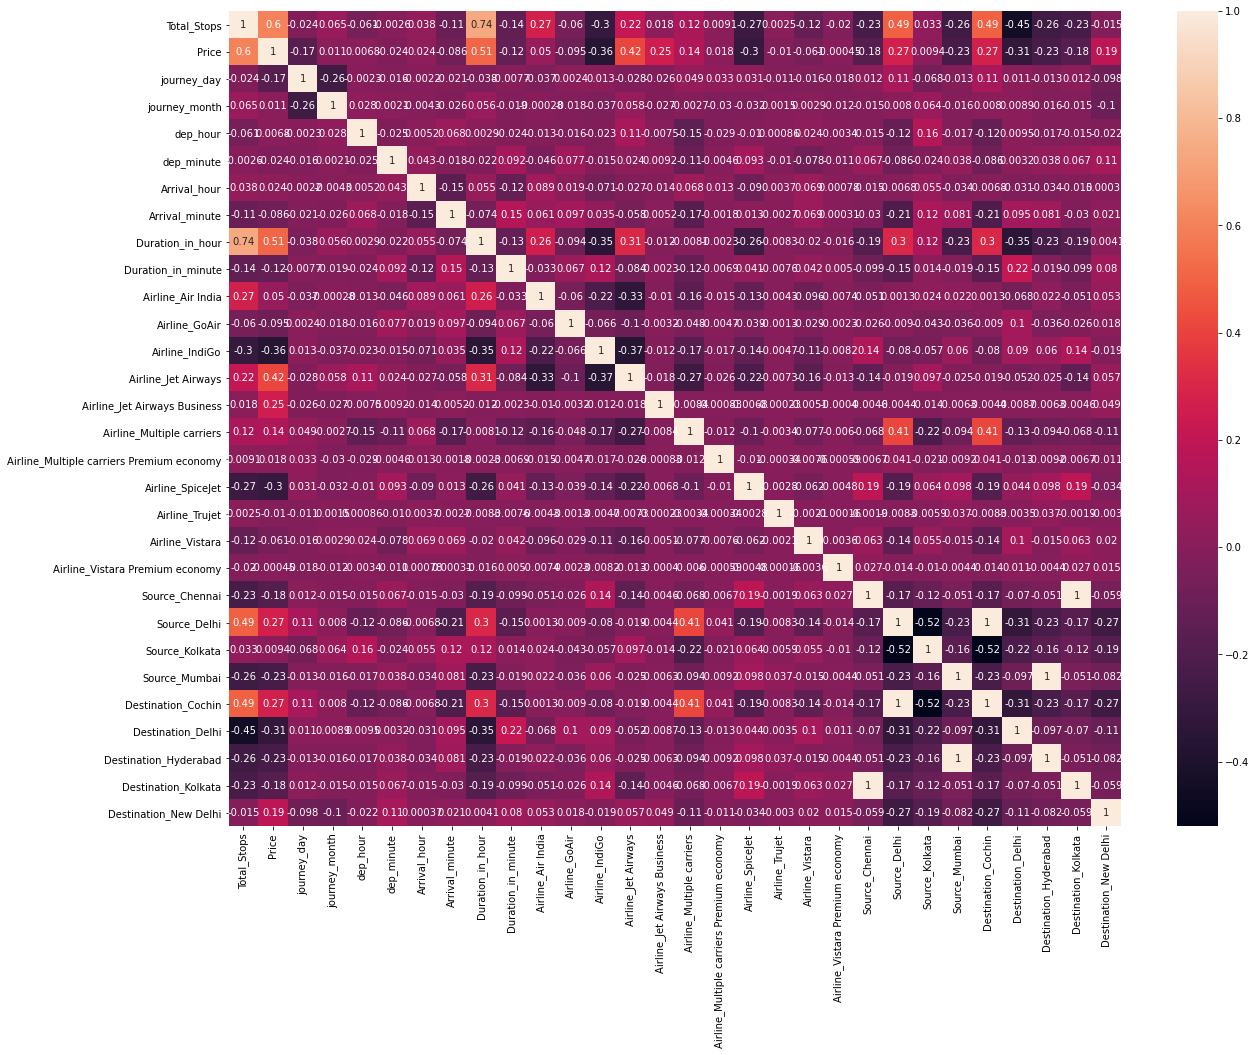

In [31]:
plt.figure(figsize = (20,15))
sns.heatmap(data_train.corr(),annot = True)

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

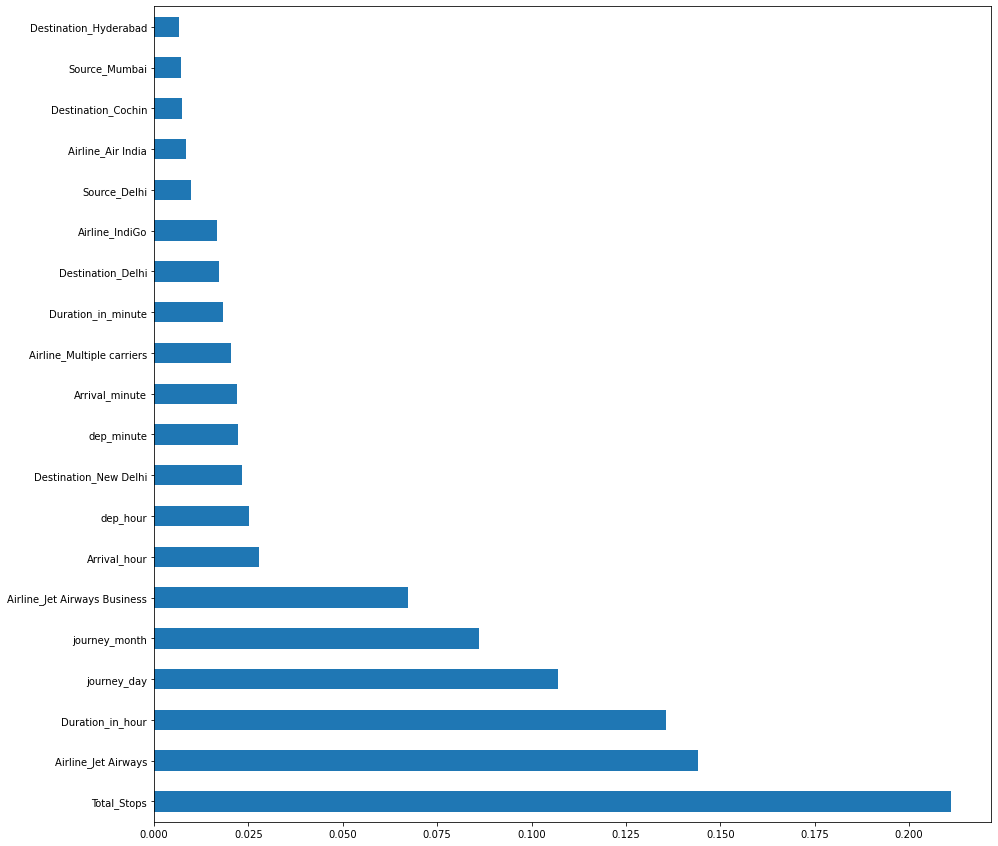

In [33]:
plt.figure(figsize = (15,15))
feature_importance = pd.Series(selection.feature_importances_, index = X.columns)
feature_importance.nlargest(20).plot(kind = 'barh')

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42,test_size = 0.2)

In [35]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
y_pred_train = reg.predict(X_train)

In [37]:
y_pred_test= reg.predict(X_test)

In [38]:
reg.score(X_train,y_train)

0.9525120700869907

In [39]:
reg.score(X_test,y_test)

0.7910299831994536

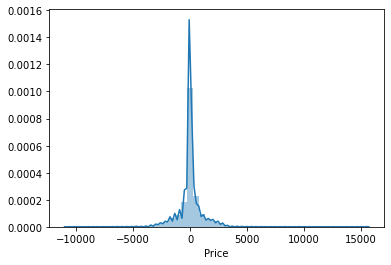

In [40]:
sns.distplot(y_train-y_pred_train)

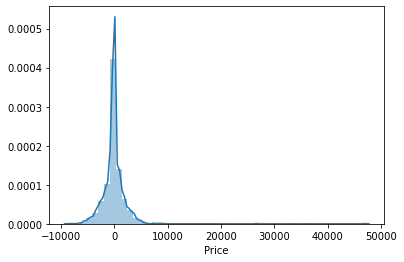

In [41]:
sns.distplot(y_test-y_pred_test)

In [42]:
from sklearn import metrics

In [43]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE:  1192.2812674763884
MSE:  4505823.272314415
RMSE:  2122.6924582507036


In [44]:
metrics.r2_score(y_test, y_pred_test)

0.7910299831994536

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
n_estimators = [int(x) for x in np.linspace(100,1200,num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [47]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_sample_leaf
    
}

In [48]:
rf = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,n_iter = 10, scoring = 'neg_mean_squared_error',verbose = True,cv = 5)

In [49]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=True)

In [50]:
rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [51]:
reg_tune = RandomForestRegressor(n_estimators = 300, min_samples_split = 10,
                                min_samples_leaf = 2, max_features = 'auto',
                                max_depth = 25)

In [52]:
reg_tune.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300)

In [53]:
y_pred_train = reg_tune.predict(X_train)

In [54]:
y_pred_test= reg_tune.predict(X_test)

In [55]:
reg_tune.score(X_train,y_train)

0.9069818977926629

In [56]:
reg_tune.score(X_test,y_test)

0.8052436887734813

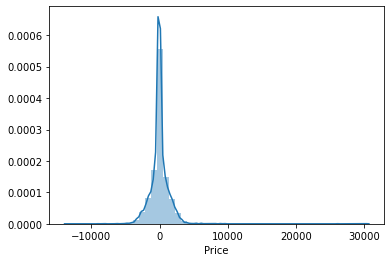

In [57]:
sns.distplot(y_train-y_pred_train)

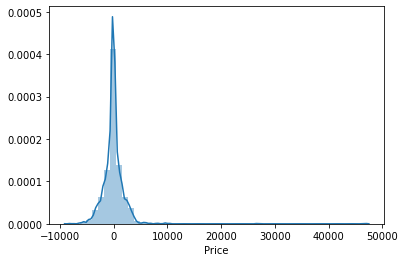

In [58]:
sns.distplot(y_test-y_pred_test)

In [59]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE:  1157.2671240284837
MSE:  4199346.552152177
RMSE:  2049.2307220399016


In [60]:
import pickle
file = open('flight_rf.pkl','wb')
pickle.dump(reg_tune,file)

In [61]:
model = open('flight_rf.pkl','rb')
model = pickle.load(model)

In [62]:
metrics.mean_absolute_error(model.predict(X_test),y_test)

1157.2671240284837

In [63]:
pd.read_pickle('flight_rf.pkl')

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300)

In [64]:
pip freeze>requirements.txt

Note: you may need to restart the kernel to use updated packages.
